# **Exploratory Data Analysis : *Consumer Behaviour* berdasarkan Generasi**

Oleh : Ian Arif Rahman

_____________________________________________________________________________________


### **Background**

Pola konsumsi tiap generasi memiliki karakter yang berbeda-beda. menurut data dari dataset yang akan kita gunakan yaitu [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data), didapatkan hasil yang tergambar di grafik dibawah ini.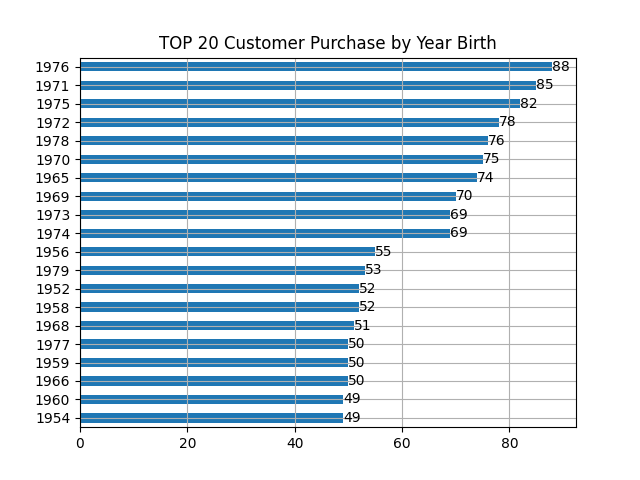

Dari data diatas, kita bisa lihat top 10 diisi oleh kelahiran 1965 sampai 1980 yang menurut  [sumber](https://fitsmallbusiness.com/gen-x-consumer-behaviors/) itu merupakan **gen X**. Jika kita ingin membuat sistem loyalty untuk customer gen X, **bagaimana sistem yang cocok dengan data yang tersedia?**

_____________________________________________________________________________________

## **0. Persiapan Data**



**0-1. Import Package**
  
  Kita akan mulai dari import library yang dibutuhkan dalam analisa ini, diantara lain sebagai berikut :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

**0-2. Dataset**

Dataset yang akan digunakan dalam Exploratory Data Analysis ini bersumber dari [kaggle.com](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data) berformat *comma-separated values (.csv)*.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PURWADHIKA/Dataset/marketing_campaign.csv', header=0, sep='\t')
pd.set_option('display.max_columns', None) # Menampilkan semua kolom
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
         'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Complain','Z_Revenue','Response'],axis=1,inplace=True)

**Year Birth -> Age and Cluster Generation**

Dalam dataset tidak diketahui tanggal dan bulan lahir dari customer, sehingga kita asumsikan semua customer lahir ditanggal **01** bulan **januari**.

dan kita asumsikan EDA ini dilakukan ditanggal **01 januari 2022** (Berdasarkan tahun diuploadnya dataset) sehingga kita akan mendapatkan estimasi **Age** dari customer menggunakan fungsi.

selain itu, kita juga bisa mendapatkan kelompok customer berdasarkan generasi umurnya ini dibutuhkan untuk kebutuhan analisa selanjutnya. Berikut merupakan nama generasi yang didasarkan pada umurnya yang dituliskan dalam laman Beresford Research menggunakan data dari Pew Research Center dan Biro Sensus AS [Sumber](https://www.detik.com/edu/detikpedia/d-6737366/7-nama-generasi-berdasarkan-umur-kamu-yang-mana):

*   Perang Dunia II dari tahun 1922 - 1927, saat ini berusia 96 - 101 tahun
*   Pasca Perang dari tahun 1928 - 1945, saat ini berusia 78 - 95 tahun

*   Boomer I dari tahun 1946 - 1954, saat ini berusia 69 - 77 tahun
*   Boomers II atau Generasi Jones dari tahun 1955 - 1964, saat ini berusia 59 - 68 tahun
*   Gen X dari tahun 1965 - 1980, saat ini berusia 43 - 58 tahun
*   Milenial dari tahun 1981 - 1996, saat ini berusia 27 - 42 tahun

*   Gen Z dari tahun 1997 - 2012, saat ini berusia 11 - 26 tahun

Namun untuk kebutuhan analisa yang lebih mudah, kita akan lebur untuk usia 59 tahun keatas menjadi 1 cluster yaitu boomer dan usia 11 tahun kebawah menjadi gen Alpha. Jadi pembagian umurnya menjadi :

*   **Boomers :**  berusia 59 tahun keatas
*   **Gen X :** berusia 43 - 58 tahun
*   **Milenial :** berusia 27 - 42 tahun
*   **Gen Z :** berusia 11 - 26 tahun
*   **Gen Alpha :** berusia 11 tahun kebawah

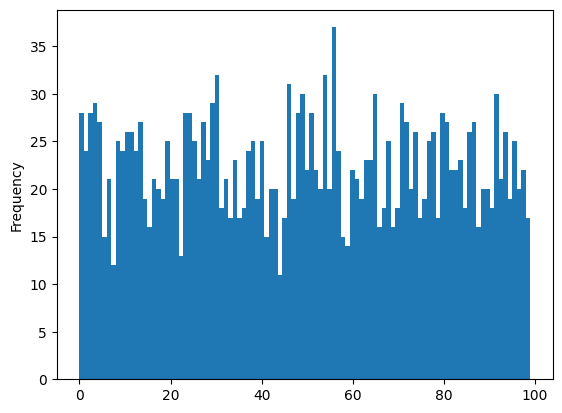

In [5]:
# mengecek sebaran data Recency
df['Recency'].plot(kind='hist',bins=100)
plt.show()


Dari data Recency diatas, kita bisa lihat angkanya berkisar antara 0-100, kita akan membuat 4 kelas yaitu :
*   Active -> 0-25
*   Slight Active -> 25-50
*   Slight Inactive -> 50-75
*   Inactive -> 75-100



In [6]:
# Membuat fungsi Usia
def Age(x):
  Age = 2022-x
  return Age

# Membuat fungsi Cluster Generasi
def Gen(x) :
  if x >= 59:
    return 'Boomers'
  elif x >=43 and x <= 58:
    return 'Gen X'
  elif x >= 27 and x <= 42:
    return 'Milenial'
  elif x >= 11 and x <= 26:
    return 'Gen Z'
  elif x <= 10:
    return 'Gen Alpha'

# Membuat fungsi R_Score
def R_Score(x) :
  if x <= 25:
    return 'Active'
  elif x >25 and x <= 50:
    return 'Slight Active'
  elif x > 50 and x <= 75:
    return 'Slight Inactive'
  elif x >75 and x <= 100:
    return 'Inactive'

In [7]:
df['Age'] = df['Year_Birth'].apply(Age)
df['Generation'] = df['Age'].apply(Gen)
df['R_Score'] = df['Recency'].apply(R_Score)
df['F_Score'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [8]:
df.drop(['Dt_Customer'],axis=1,inplace=True)

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age',
       'Generation', 'R_Score', 'F_Score'],
      dtype='object')

In [10]:
df = df.reindex(['ID','Year_Birth','Age','Generation','Education','Marital_Status','Income','Kidhome','Teenhome',
                 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                 'F_Score','Recency','R_Score'], axis=1)
df.head()

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
0,5524,1957,65,Boomers,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,1617,58,Slight Inactive
1,2174,1954,68,Boomers,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,27,38,Slight Active
2,4141,1965,57,Gen X,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,776,26,Slight Active
3,6182,1984,38,Milenial,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,53,26,Slight Active
4,5324,1981,41,Milenial,PhD,Married,58293.0,1,0,173,43,118,46,27,15,422,94,Inactive
5,7446,1967,55,Gen X,Master,Together,62513.0,0,1,520,42,98,0,42,14,716,16,Active
6,965,1971,51,Gen X,Graduation,Divorced,55635.0,0,1,235,65,164,50,49,27,590,34,Slight Active
7,6177,1985,37,Milenial,PhD,Married,33454.0,1,0,76,10,56,3,1,23,169,32,Slight Active
8,4855,1974,48,Gen X,PhD,Together,30351.0,1,0,14,0,24,3,3,2,46,19,Active
9,5899,1950,72,Boomers,PhD,Together,5648.0,1,1,28,0,6,1,1,13,49,68,Slight Inactive


_____________________________________________________________________________________

## **1. Data Understanding & Data Cleaning**

**1.1. Pengecekan Type dan Dimensi Data**

In [11]:
# pengecekan tipe data
print(f'Jumlah baris dan kolom di dataset ini berturut-turut adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset ini berturut-turut adalah (2240, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Year_Birth        2240 non-null   int64  
 2   Age               2240 non-null   int64  
 3   Generation        2240 non-null   object 
 4   Education         2240 non-null   object 
 5   Marital_Status    2240 non-null   object 
 6   Income            2216 non-null   float64
 7   Kidhome           2240 non-null   int64  
 8   Teenhome          2240 non-null   int64  
 9   MntWines          2240 non-null   int64  
 10  MntFruits         2240 non-null   int64  
 11  MntMeatProducts   2240 non-null   int64  
 12  MntFishProducts   2240 non-null   int64  
 13  MntSweetProducts  2240 non-null   int64  
 14  MntGoldProds      2240 non-null   int64  
 15  F_Score           

**1.2. Statistik Deskriptif**

Statistik deskriptif adalah koefisien informasi singkat yang meringkas kumpulan data yang diberikan, yang dapat berupa representasi dari seluruh populasi atau sampel dari suatu populasi. berikut statistik deskriptif dari data set ini ditampilkan ditabel dibawah

In [12]:
display(df.describe(),
        df.describe(include='object'))

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,53.194196,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,49.109375
std,3246.662198,11.984069,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,28.962453
min,0.000000,1893.000000,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2828.250000,1959.000000,45.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,24.000000
50%,5458.500000,1970.000000,52.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,49.000000
75%,8427.750000,1977.000000,63.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,74.000000
max,11191.000000,1996.000000,129.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,99.000000


,Generation,Education,Marital_Status,R_Score
count,2240,2240,2240,2240
unique,4,5,8,4
top,Gen X,Graduation,Married,Active
freq,1072,1127,864,592


In [13]:
# Deskripsi Data
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,ID,int64,0,0.00,2240,"[7290, 9960]"
1,Year_Birth,int64,0,0.00,59,"[1967, 1994]"
2,Age,int64,0,0.00,59,"[37, 75]"
3,Generation,object,0,0.00,4,"[Milenial, Gen Z]"
4,Education,object,0,0.00,5,"[Graduation, PhD]"
5,Marital_Status,object,0,0.00,8,"[YOLO, Widow]"
6,Income,float64,24,1.07,1974,"[30279.0, 49967.0]"
7,Kidhome,int64,0,0.00,3,"[1, 2]"
8,Teenhome,int64,0,0.00,3,"[2, 1]"
9,MntWines,int64,0,0.00,776,"[61, 833]"


**1.3. Missing Value**

Menurut tabel diatas, terdapat **24** data null dalam kolom **Income**. Karena persentasenya hanya sekitar **1%**, maka kita putuskan untuk drop

In [14]:
# drop data null
df = df.dropna()

# Cek missing value
df.isnull().sum()

ID                  0
Year_Birth          0
Age                 0
Generation          0
Education           0
Marital_Status      0
Income              0
Kidhome             0
Teenhome            0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
F_Score             0
Recency             0
R_Score             0
dtype: int64

Clear, sekarang **sudah tidak ada missing values** pada data

**1.4. Pengecekan Duplicate Value**

Memeriksa apakah ada data yang terduplikasi. Ini penting, karena bisa mempengaruhi analisa diproses berikutnya. untuk mengecek data duplicate, kita asumsikan kolom ID merepresentasikan kode unik dari setiap customer, sehingga kita bisa gunakan **kolom ID** untuk mengecek apakah ada data yang duplicate

In [15]:
df['ID'].duplicated().sum()

0

dari proses diatas, bisa kita asumsikan bahwa **tidak ada data duplicate.** Sekarang kita sudah tidak memerlukan kolom **ID**, sehingga akan kita **drop**

In [16]:
df.drop(['ID'],axis=1,inplace=True)

**1.5. Pengecekan Outliers**

dari semua kolom, kita memutuskan hanya 2 kolom yaitu **Age & Income** yang akan kita cari outliersnya.

untuk kolom numerik lain, tidak dicari outliers karena alasan seperti berikut :

*   ID : merupakan kode unik
*   Income : Penghasilan itu dari 0 sampai dengan tidak terbatas
*   Kidhome & Teenhome : jumlah anak dan remaja dari 0 sampai tidak terbatas
*   Recency : Jumlah hari dari terakhir customer memesan, jadi tidak terbatas
*   MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds : Merupakan banyaknya produk yang dibeli jadi harusnya tidak terbatas jumlah
*   Complain : Terdiri dari 2 nilai saja yaitu 0 dan 1, jadi tidak perlu mencari outliers

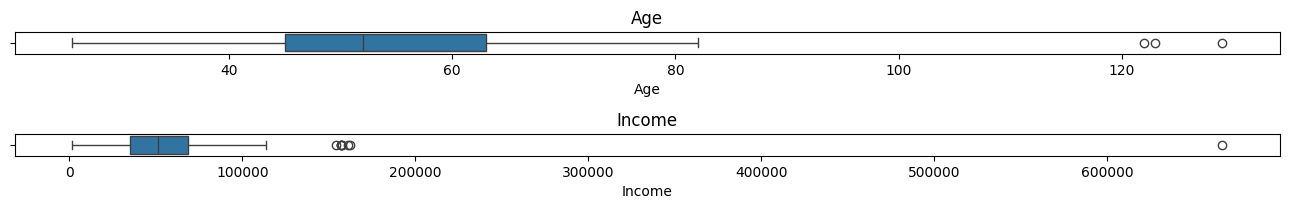

In [17]:
# Pengecekan Outliers Age
feature = ['Age','Income']
plt.figure(figsize=(13, 13))

for idx, col in enumerate(feature, start=1):
    plt.subplot(13, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Dari pengecekan diatas, kita bisa lihat ada **3 customer yang memiliki umur diatas 120 tahun** dan ada **7 customer yang mempunyai income diatas 140.000.** kita putuskan untuk melakukan drop karena angkanya jauh dari populasi dan jumlahnyapun sedikit

In [18]:
df.loc[df['Age']>120]

,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
192,1900,122,Boomers,2n Cycle,Divorced,36640.0,1,0,15,6,8,7,4,25,65,99,Inactive
239,1893,129,Boomers,2n Cycle,Single,60182.0,0,1,8,0,5,7,0,2,22,23,Active
339,1899,123,Boomers,PhD,Together,83532.0,0,0,755,144,562,104,64,224,1853,36,Slight Active


In [19]:
df.loc[df['Income']>140000]

,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
164,1973,49,Gen X,PhD,Married,157243.0,0,1,20,2,1582,1,2,1,1608,98,Inactive
617,1976,46,Gen X,PhD,Together,162397.0,1,1,85,1,16,2,1,2,107,31,Slight Active
655,1975,47,Gen X,Graduation,Divorced,153924.0,0,0,1,1,1,1,1,1,6,81,Inactive
687,1982,40,Milenial,PhD,Married,160803.0,0,0,55,16,1622,17,3,4,1717,21,Active
1300,1971,51,Gen X,Master,Together,157733.0,1,0,39,1,9,2,0,8,59,37,Slight Active
1653,1977,45,Gen X,Graduation,Together,157146.0,0,0,1,0,1725,2,1,1,1730,13,Active
2132,1949,73,Boomers,PhD,Married,156924.0,0,0,2,1,2,1,1,1,8,85,Inactive
2233,1977,45,Gen X,Graduation,Together,666666.0,1,0,9,14,18,8,1,12,62,23,Active


In [20]:
df.drop(index=[192,239,339,164,617,655,687,1300,1653,2132,2233], inplace=True)
df.reset_index()

,index,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
0,0,1957,65,Boomers,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,1617,58,Slight Inactive
1,1,1954,68,Boomers,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,27,38,Slight Active
2,2,1965,57,Gen X,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,776,26,Slight Active
3,3,1984,38,Milenial,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,53,26,Slight Active
4,4,1981,41,Milenial,PhD,Married,58293.0,1,0,173,43,118,46,27,15,422,94,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2235,1967,55,Gen X,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,1341,46,Slight Active
2201,2236,1946,76,Boomers,PhD,Together,64014.0,2,1,406,0,30,0,0,8,444,56,Slight Inactive
2202,2237,1981,41,Milenial,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,1241,91,Inactive
2203,2238,1956,66,Boomers,Master,Together,69245.0,0,1,428,30,214,80,30,61,843,8,Active


**1.6. Pengecekan Variasi kolom String**

In [21]:
GenUnique = df['Generation'].unique()
EduUnique = df['Education'].unique()
MaritalUnique = df['Marital_Status'].unique()

print(f'varian dari kolom Generation : {GenUnique}')
print(f'varian dari kolom Education : {EduUnique}')
print(f'varian dari kolom Marital Status : {MaritalUnique}')

varian dari kolom Generation : ['Boomers' 'Gen X' 'Milenial' 'Gen Z']
varian dari kolom Education : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
varian dari kolom Marital Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [22]:
df.query('Marital_Status == "YOLO"')

,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
2177,1973,49,Gen X,PhD,YOLO,48432.0,0,1,322,3,50,4,3,42,424,3,Active
2202,1973,49,Gen X,PhD,YOLO,48432.0,0,1,322,3,50,4,3,42,424,3,Active


In [23]:
df.query('Marital_Status == "Absurd"')

,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
2093,1993,29,Milenial,Graduation,Absurd,79244.0,0,0,471,102,125,212,61,245,1216,58,Slight Inactive
2134,1957,65,Boomers,Master,Absurd,65487.0,0,0,240,67,500,199,0,163,1169,48,Slight Active



Ada beberapa unique value yang perlu diterjemahkan dulu
*   Kolom Generation : Clear
*   Kolom Graduation : Ada unique **2n Cycle** yang menurut [sumber](https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/), ini setara dengan **Master** jadi nanti kita akan lebur
*   Kolom Marital Status : Dikolom ini kita menemukan beberapa unique value yang kita akan kelompokkan sesuai interpretasi. kita akan coba kelompokkan menjadi 3 yaitu **Single, Married, Divorced**. untuk Together kita masukan ke Married, Widow (Duda) kita masukan ke Divorced, Alone ke single. untuk absurd & YOLO kita tidak menemukan padanannya.
*   **YOLO dan Absurd** karena kita tidak menemukan padanannya dan jumlahnyapun tidak banyak (masing-masing 2 baris), maka kami memutuskan untuk **di drop**





In [24]:
df = df.replace('2n Cycle', 'Master')
df = df.replace('Together', 'Married')
df = df.replace('Widow', 'Divorced')
df = df.replace('Alone', 'Single')

In [25]:
df.drop(index=[2177,2202,2093,2134], inplace=True)
df.reset_index()

,index,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
0,0,1957,65,Boomers,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,1617,58,Slight Inactive
1,1,1954,68,Boomers,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,27,38,Slight Active
2,2,1965,57,Gen X,Graduation,Married,71613.0,0,0,426,49,127,111,21,42,776,26,Slight Active
3,3,1984,38,Milenial,Graduation,Married,26646.0,1,0,11,4,20,10,3,5,53,26,Slight Active
4,4,1981,41,Milenial,PhD,Married,58293.0,1,0,173,43,118,46,27,15,422,94,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2235,1967,55,Gen X,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,1341,46,Slight Active
2197,2236,1946,76,Boomers,PhD,Married,64014.0,2,1,406,0,30,0,0,8,444,56,Slight Inactive
2198,2237,1981,41,Milenial,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,1241,91,Inactive
2199,2238,1956,66,Boomers,Master,Married,69245.0,0,1,428,30,214,80,30,61,843,8,Active


In [26]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [27]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [28]:
# membuat segmentasi data untuk Gen X untuk selanjutnya yang akan digunakan untuk analisis ketahap berikutnya
genX = df.loc[df['Generation']=='Gen X']
genX.drop(['Generation'],axis=1,inplace=True)
genX.head()


,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,F_Score,Recency,R_Score
2,1965,57,Graduation,Married,71613.0,0,0,426,49,127,111,21,42,776,26,Slight Active
5,1967,55,Master,Married,62513.0,0,1,520,42,98,0,42,14,716,16,Active
6,1971,51,Graduation,Divorced,55635.0,0,1,235,65,164,50,49,27,590,34,Slight Active
8,1974,48,PhD,Married,30351.0,1,0,14,0,24,3,3,2,46,19,Active
11,1976,46,Basic,Married,7500.0,0,0,6,16,11,11,1,16,61,59,Slight Inactive


_____________________________________________________________________________________

## **2. Explolatory Data Analysis**


**2.1. Analisis Kolom Univariate**

**Business Question 1 : bagaimana komposisi Education, Marital Status, Kidhome, Teenhome dalam Gen X?**

In [29]:
# Education
pd.crosstab(index=genX['Education'],
            columns='Count').sort_values(by='Count', ascending=True).T

Education,Basic,PhD,Master,Graduation
col_0,,,,
Count,22,223,266,544


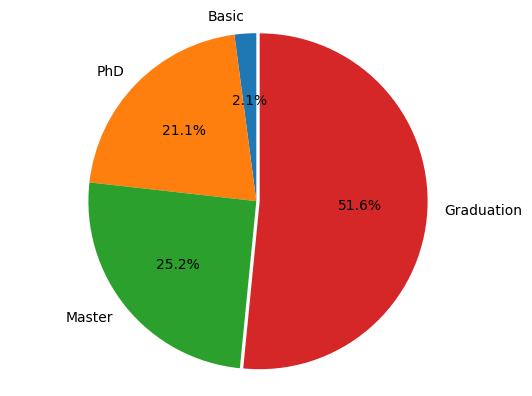

In [30]:
labels = 'Basic','PhD', 'Master', 'Graduation'
sizes = [22,223,266,544]
explode = (0.00,0.00,0.00,0.02)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In [31]:
# Marital Status
pd.crosstab(index=genX['Marital_Status'],
            columns='Count').sort_values(by='Count', ascending=True).T

Marital_Status,Divorced,Single,Married
col_0,,,
Count,153,206,696


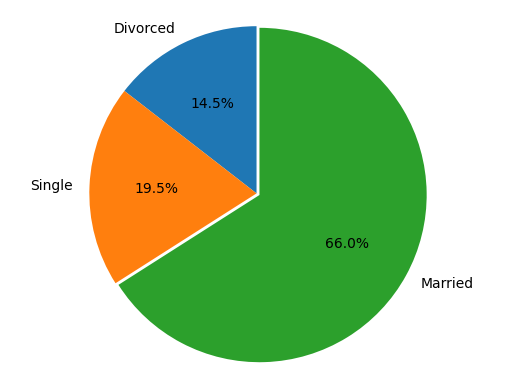

In [32]:
labels = 'Divorced', 'Single', 'Married'
sizes = [153,206,696]
explode = (0.00,0.00,0.02)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In [33]:
# Kidhome
pd.crosstab(index=genX['Kidhome'],
            columns='Count').sort_values(by='Count', ascending=True).T

Kidhome,2,1,0
col_0,,,
Count,28,509,518


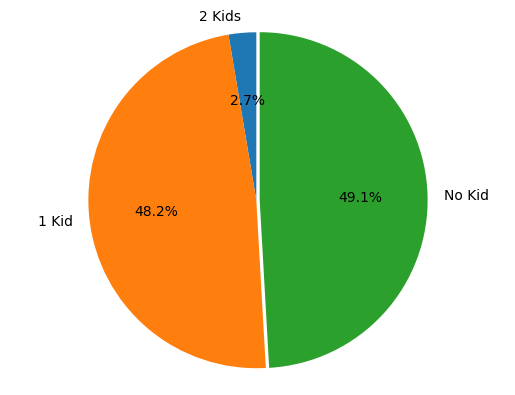

In [34]:
labels = '2 Kids', '1 Kid', 'No Kid'
sizes = [28,509,518]
explode = (0.00,0.00,0.02)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In [35]:
# Teenhome
pd.crosstab(index=genX['Teenhome'],
            columns='Count').sort_values(by='Count', ascending=True).T

Teenhome,2,0,1
col_0,,,
Count,24,489,542


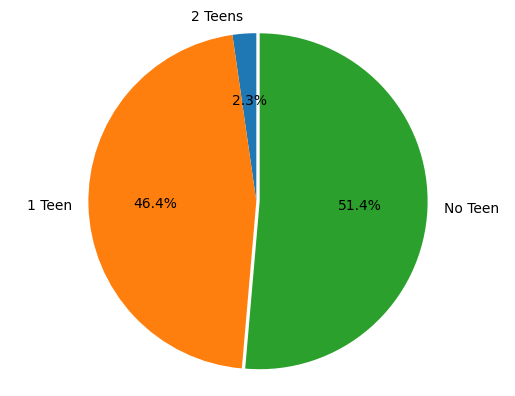

In [36]:
labels = '2 Teens', '1 Teen', 'No Teen'
sizes = [24,489,542]
explode = (0.00,0.00,0.02)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

Insight :

*   untuk penggolongan **Education**, yang terbanyak didominasi **Graduation** sebanyak **51%**
*   untuk penggolongan **Marital Status** didominasi oleh **Married** sebesar **66%**
*   untuk penggolongan **Kidhome**, didominasi **No Kid & 1 Kid**, diangka **49,1% & 48,2%**, kita ambil dua-duanya karena proporsinya tidak terlalu jauh
*   untuk penggolongan **Teenhome**, didominasi oleh **No Teen & 1 Teen** diangka berturut-turut **51,4% & 46,4%**, kita ambil dua-duanya karena selisihnya tidak jauh

Action :
*   **Education** biasanya berpengaruh dengan pekerjaan. logicnya, saat pendidikan makin tinggi, maka akan mendapatkan pekerjaan lebih baik. karena banyak yang hanya lulusan **Graduation**, maka tidak perlu membuat loyalty yang berbasis pekerjaannya apa.
*   **Marital Status** didominasi oleh **Married**, kita bisa membuat loyalty seperti Couple loyalty (bisa digabung pointnya)
*   **Kidhome** didominasi oleh **No Kid & 1 Kid** dan **Teenhome** juga didominasi oleh **No Teen & 1 Teen**, kita bisa arahkan ke program bundling family dengan porsi untuk 4 orang (Ayah, ibu, 1 Teen, 1 Kid)


**Business Question 2 : bagaimana sebaran Income & Recency Score dalam Gen X?**

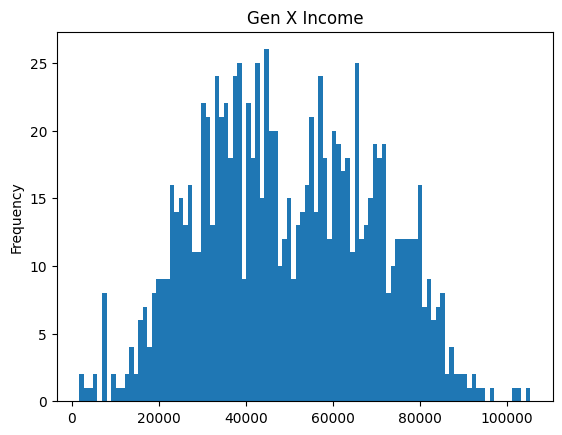

In [37]:
# sebaran income genX
ax = genX['Income'].plot(kind='hist', bins=100, title = 'Gen X Income')

Insight :
*    Distribusi Income Gen X relatif **normal** diangka **40000-60000**

Action :
*   Kita harus melakukan analisa lebih lanjut tentang **spending mereka untuk konsumsi secara nominal gaji** ke pembelian dalam kurun waktu tertentu contohnya dalam 1 bulan, lalu kita petakan berapa **budget yang mereka punya untuk membeli barang-barang ini**. Dari situ kita bisa melakukan **simulasi item apa yang cocok dijual** dengan mempertimbangkan harga tetapi secara kebutuhan, terpenuhi





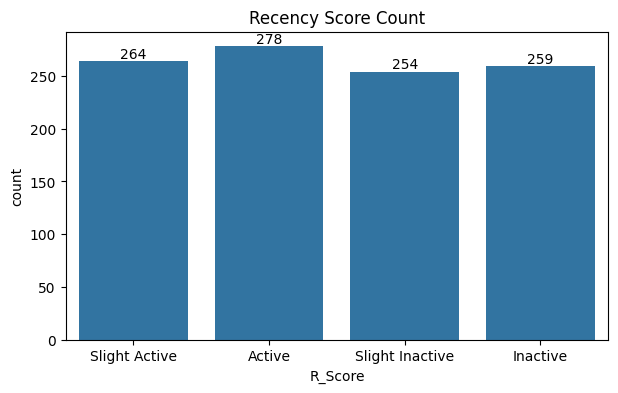

In [38]:
# Sebaran Recency
plt.figure(figsize=(7, 4))
graph = sns.countplot(x = 'R_Score', data = genX)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Recency Score Count')
plt.show()

insight :
*    pengguna **active** masih mendominasi tapi perbandingannya tidak beda jauh dengan yang lain

Action :
*   kita memutuskan untuk **menawarkan jenis loyalty yang sama** baik yang active sampai inactive



---



**2.2. Analisis Kolom Multivariate**

**Business Question 3 : bagaimana Sebaran Product yang sering dibeli berdasarkan Education, Marital Status, Kidhome, Teenhome dalam Gen X?**

In [39]:
# Edu vs Amount
EduVsMnt = genX[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Education']].groupby('Education').sum()
EduVsMnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,64,191,190,242,121,411
Graduation,145294,16116,87119,21710,16321,25535
Master,69741,5406,30854,8049,6100,10673
PhD,78050,4085,33743,5248,4136,6622


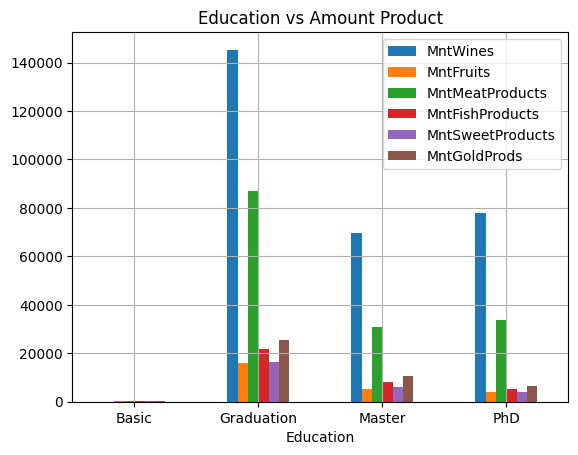

In [40]:
EduVsMnt.plot(kind='bar',stacked=False,title='Education vs Amount Product')
plt.xticks(rotation ='horizontal')
plt.grid(True)
plt.show()

In [41]:
# Marital_Status vs Mnt
MaritalVsMnt = genX[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status']].groupby('Marital_Status').sum()
MaritalVsMnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,46724,4373,20111,4927,4278,7163
Married,194938,16310,100927,22705,18092,27114
Single,51487,5115,30868,7617,4308,8964


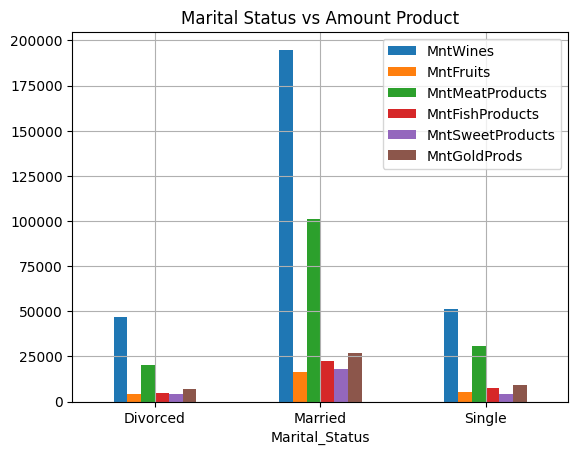

In [42]:
MaritalVsMnt.plot(kind='bar',stacked=False,title='Marital Status vs Amount Product')
plt.xticks(rotation ='horizontal')
plt.grid(True)
plt.show()

In [43]:
# Kidhome vs Amount
KidVsMnt = genX[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Kidhome']].groupby('Kidhome').sum()
KidVsMnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,235489,21252,124638,28955,22085,31535
1,56010,4348,26313,6093,4485,11139
2,1650,198,955,201,108,567


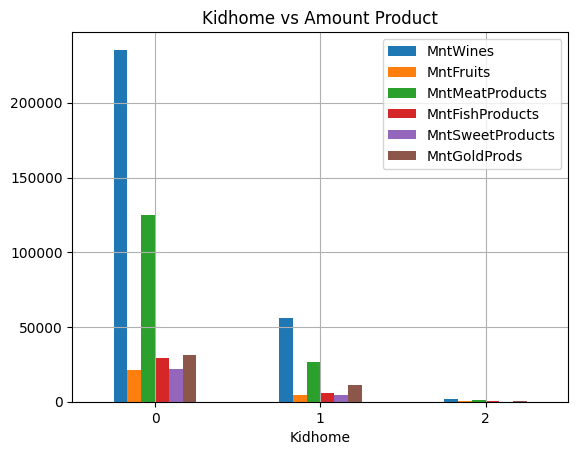

In [44]:
KidVsMnt.plot(kind='bar',stacked=False,title='Kidhome vs Amount Product')
plt.xticks(rotation ='horizontal')
plt.grid(True)
plt.show()

In [45]:
# Teenhome vs Amount
TeenVsMnt = genX[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Teenhome']].groupby('Teenhome').sum()
TeenVsMnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,122496,15099,93520,20031,14796,17949
1,162023,10231,55101,14722,11447,24038
2,8630,468,3285,496,435,1254


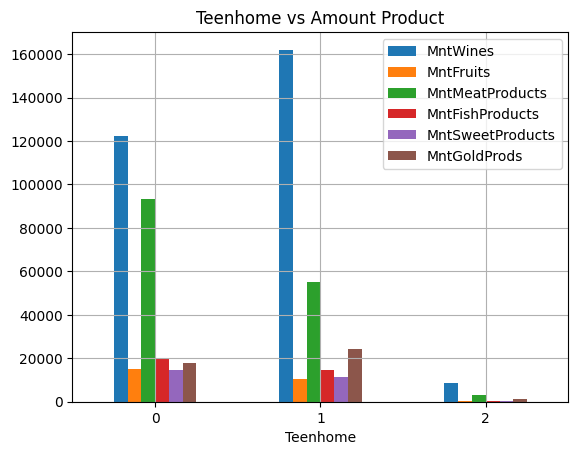

In [46]:
TeenVsMnt.plot(kind='bar',stacked=False,title='Teenhome vs Amount Product')
plt.xticks(rotation ='horizontal')
plt.grid(True)
plt.show()

Insight :
*   **Education vs Amount Product** product terfavorit berturut-turut : **Wines, Meat, Gold**
*   **Marital Status vs Amount Product** product terfavorit berturut-turut : **Wines, Meat, Gold**
* **Kidhome vs Amount Product** product terfavorit berturut-turut : **Wines, Meat, Gold**
*   **Teenhome Status vs Amount Product** product terfavorit berturut-turut : **Wines, Meat, Gold**
*   Ketiga kategori diatas secara konsisten menempatkan peringkat 3 terbawahnya oleh product **Sweet, Fruit, Fish**

Action :
*   schema yang bisa kita coba salah satunya dengan **menggabungkan top performance product dengan bad performance product**. Bisa kita ikat dengan bundling yang sifatnya thematik seperti **Promo Meat, Fruit, Fish**. Diusia **Generasi X biasanya sudah mulai aware dengan kesehatan**, kita bisa tawarkan **paket makanan sehat atau diet** dengan paket item tersebut


**Business Question 4 : bagaimana bagaimana pengaruh income dari Gen X dalam pembelian product?**

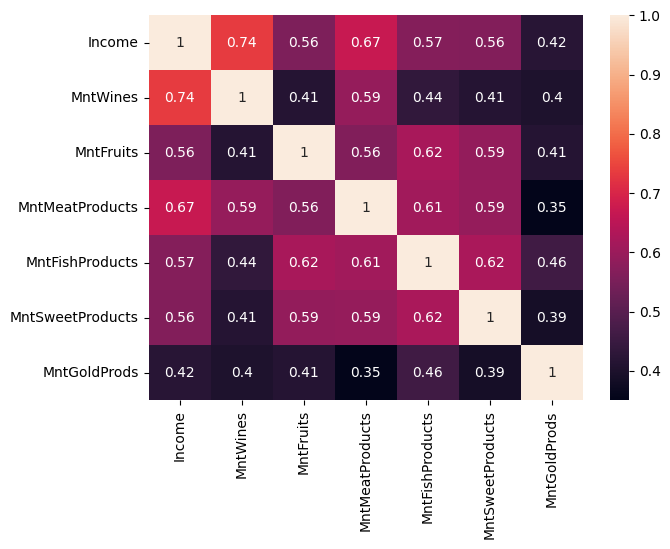

In [47]:
genXcorr = genX[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
plt.figure(figsize=(7,5))
sns.heatmap(genXcorr.corr('pearson'), annot=True)
plt.show()

insight :
*   **Income** memiliki korelasi positif dengan pembelian produk dari paling rendah adalah **MntGoldProds** dan tertinggi **MntWines**
*   **Kidhome** dan **Teenhome** memiliki korelasi negatif dari pembelian produk
*   Sesama pembelian item produk punya korelasi, artinya **customer yang membeli suatu produk cenderung akan membeli produk yang lainnya juga**

Action :
*   Kita bisa melihat korelasi terbaik terhadap income adalah product wine & meat. Kita bisa lakukan loyalty bertype deposit dengan pancingan mereka akan mendapatkan **FREE Wine & Meat** dalam kuantiti tertentu
*   **Wine & Meat adalah combo makanan dan minuman yang disukai** oleh orang eropa dan amerika yang mempunyai musim dingin ini bisa kita tawarkan untuk kelas income yang diatas rata-rata yang bisa kita katakan orang kaya dengan loyalty kelas teratas.
*   **Kidhome & Teenhome mempunyai korelasi buruk**, artinya makin banyak jumlah anak, makin berkurang belanja ditempat kita, kita mungkin lebih **fokus ke customer yang datang dari keluarga kecil dengan anggota keluarga 2-4 orang**
*   **Customer berkecenderungan belanja dengan variasi product** artinya kita bisa tawarkan loyalty dengan sistem **bundling kebutuhan sehari-hari**, misal paket harian untuk memasak harian. kita bisa siapkan juga sistem **delivery dengan pesanan yang lebih dulu diinfo ke toko melalui handphone sehingga customer merasa dilayani tanpa repot harus keluar rumah**. untuk biaya delivery kita bisa charge atau bisa menjadi benefit jika menjadi member ditempat kita.



**Business Question 5 : Berapa kira-kira angka treshold produk menurut demografi customer dan customer demografi seperti apa yang bisa kita optimalkan untuk menaikan frekuensi penjualan ditempat kita?**

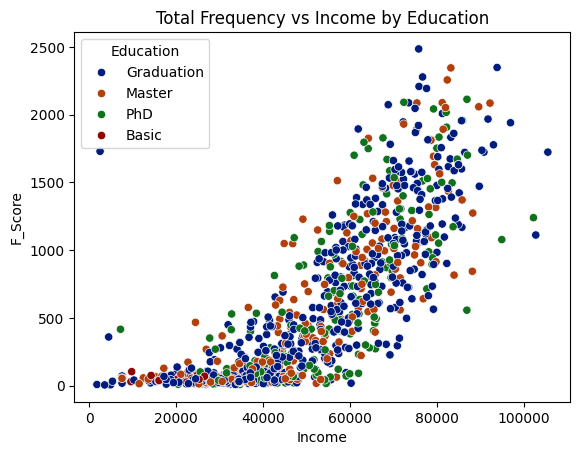

In [53]:
sns.scatterplot(x='Income',
                y='F_Score',
                hue='Education',
                palette='dark',
                data=genX)
plt.title('Total Frequency vs Income by Education')
plt.show()

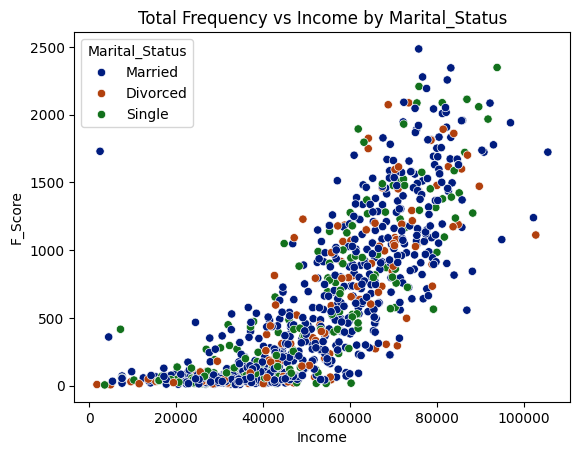

In [49]:
sns.scatterplot(x='Income',
                y='F_Score',
                hue='Marital_Status',
                palette='dark',
                data=genX)
plt.title('Total Frequency vs Income by Marital_Status')
plt.show()

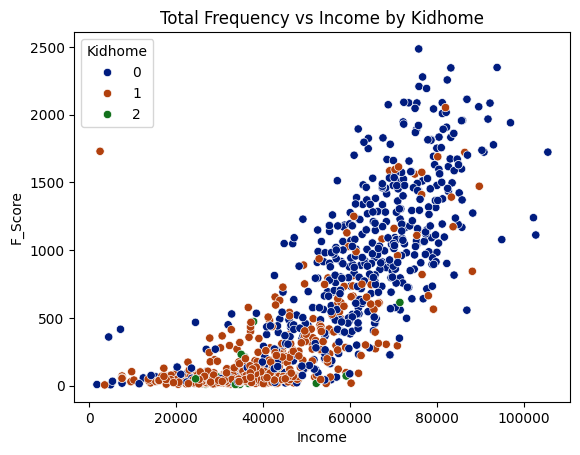

In [50]:
sns.scatterplot(x='Income',
                y='F_Score',
                hue='Kidhome',
                palette='dark',
                data=genX)
plt.title('Total Frequency vs Income by Kidhome')
plt.show()

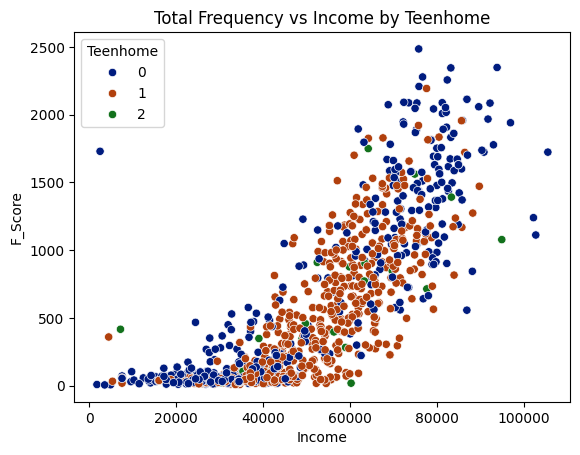

In [51]:
sns.scatterplot(x='Income',
                y='F_Score',
                hue='Teenhome',
                palette='dark',
                data=genX)
plt.title('Total Frequency vs Income by Teenhome')
plt.show()

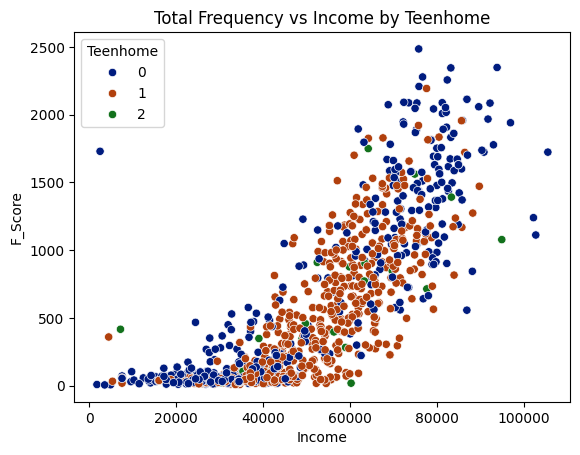

In [52]:
sns.scatterplot(x='Income',
                y='F_Score',
                hue='Teenhome',
                palette='dark',
                data=genX)
plt.title('Total Frequency vs Income by Teenhome')
plt.show()

insight :
*  **F Score vs Income by Education** -> Tidak ada pola
*   **F Score vs Income by Marital Status** -> Tidak ada pola
*   **F Score vs Income by Kidhome** -> banyak yang memiliki 1 kidhome memiliki penghasilan **dibawah 60000**
*   **F Score vs Income by Teenhome** -> No Teenhome terbagi 2 grup antara penghasilan **40000 dan 70000** sedangkan 1 Teenhome berkumpul antara **40000-80000**

Action :

*   Banyak customer yang memiliki 1 Kidhome dan berpenghasilan dibawah **60000**, kita bisa **buatkan produk dengan harga yang lebih murah,** mungkin dengan menurunkan kualitasnya untuk menjangkau customer dengan pendapatan kecil. Kita bisa **buatkan loyalty dengan kelas ke 3** untuk mengakomodir customer low income
*   Untuk customer dengan no Teenhome terlihat sebarannya ada yang incomenya masih dibawah **60000**. Jika dicross dengan data 1 Kidhome, kita bisa tarik **kesimpulan bahwa ini adalah keluarga baru menikah karena memiliki 1 Kidhome dan No Teenhome**, Loyalty khusus keluarga baru dengan paket harga yang terjangkau bisa jadi opsi untuk menaikan frekuensi pembelian
*   Untuk customer berpenghasilan diatas **70000** didominasi oleh No Teenhome. Jika dicross dengan Kidhome, rata2 di income itu No Kidhome juga, sehingga bisa kita simpulkan bahwa ini pasangan yang belum menikah.


